# Visualisation de données

L'analyse de données s'appuie souvent sur l'étude graphique des données. En fonction de la nature des données caractérisant les individus, à savoir qualitatives ou quantitatives, du nombre de variables décrivant les individus, nous en déduisons les graphiques associés.
Pour rappel :

* graphiques univariés pour une seule variable

  * variable qualitative : diagrammes de fréquence et diagrammes circulaires

  * variable quantitative : histogramme, box-plots, barrres de moyennes

* graphiques croisés pour plusieurs variables

  * entre deux variables quantitatives : nuage de points

  * entre une variable qualitative et une variable quantitative : histogrammes, box-plots

Référence : https://mpra.ub.uni-muenchen.de/76653/1/MPRA_paper_76653.pdf


In [1]:
# Chargement des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt

## Chargement des données

In [2]:
# création de la matrice de données
df = pd.read_csv("WineDataSet.csv")
df = df.rename(columns=({
    'Column1':'Class',
    'Column2':'Alcohol',
    'Column3':'Malic_Acid',
    'Column4':'Ash',
    'Column5':'Ash_Alcalinity',
    'Column6':'Magnesium',
    'Column7':'Total_Phenols',
    'Column8':'Flavanoids',
    'Column9':'Nonflavanoid_Phenols',
    'Column10':'Proanthocyanins',
    'Column11':'Colour_Intensity',
    'Column12':'Hue',
    'Column13':'OD280/OD315_of_diluted_wines',
    'Column14':'Proline'
}))
df.head()

Class  Alcohol  Malic_Acid   Ash  Ash_Alcalinity  Magnesium  Total_Phenols  \
0      1    14.23        1.71  2.43            15.6        127           2.80   
1      1    13.20        1.78  2.14            11.2        100           2.65   
2      1    13.16        2.36  2.67            18.6        101           2.80   
3      1    14.37        1.95  2.50            16.8        113           3.85   
4      1    13.24        2.59  2.87            21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Colour_Intensity   Hue  \
0        3.06                  0.28             2.29              5.64  1.04   
1        2.76                  0.26             1.28              4.38  1.05   
2        3.24                  0.30             2.81              5.68  1.03   
3        3.49                  0.24             2.18              7.80  0.86   
4        2.69                  0.39             1.82              4.32  1.04   

   OD280/OD315_of_diluted_wines  Proline  
0                          3.92     1065  
1                          3.40     1050  
2                          3.17     1185  
3                          3.45     1480  
4                          2.93      735

## Graphiques simples

Quelques [graphiques de base](http://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) utiles pour une exploration sommaire des données :

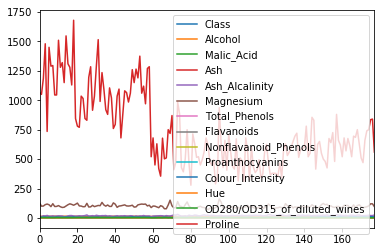

In [3]:
df.plot()

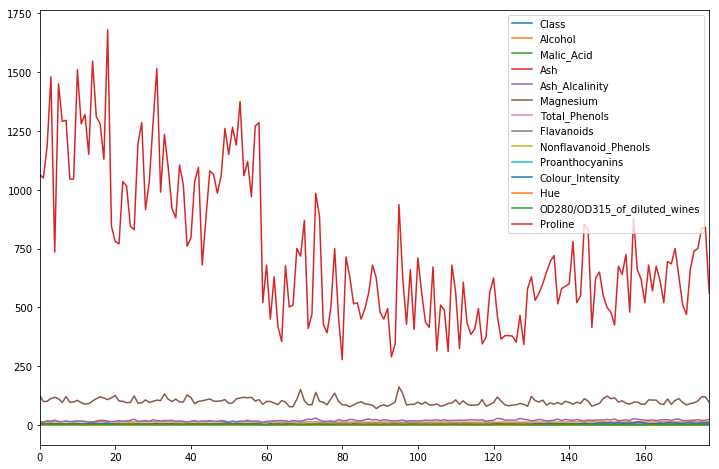

In [4]:
# le même graphique en plus grand
df.plot(figsize=(12, 8))

In [5]:
# Graphique sur une seule colonne
df.Magnesium.plot()

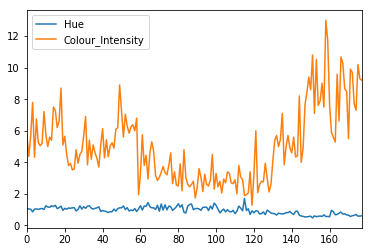

In [6]:
# Graphique sur plusieurs colonnnes
df[['Hue', 'Colour_Intensity']].plot()

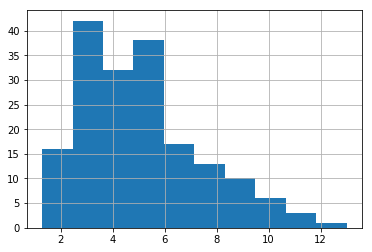

In [7]:
# Histogramme (distribution des valeurs) d'une colonne
df.Colour_Intensity.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59dd8dc908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f59dd8654e0>]], dtype=object)

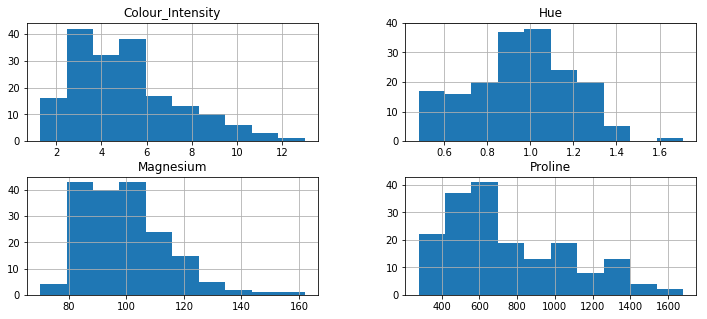

In [8]:
# Histogramme (distribution des valeurs) sur plusieurs colonnes
df[['Hue', 'Colour_Intensity', 'Magnesium', 'Proline']].hist(figsize=(12, 5))

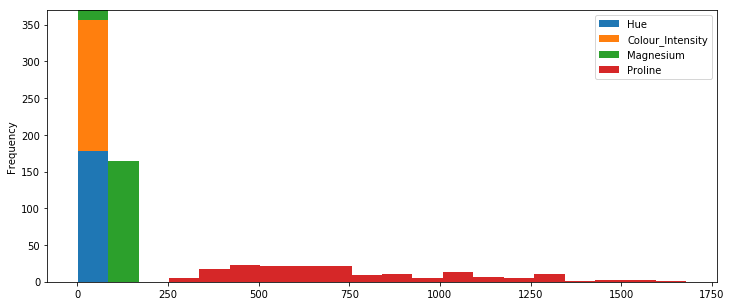

In [9]:
# Les histogrammes précédents sur le même graphique :
df[['Hue', 'Colour_Intensity', 'Magnesium', 'Proline']].plot.hist(stacked=True, bins=20, figsize=(12, 5))

In [10]:
# Calcul de variables centrées-réduites
df['Hue2'] = (df.Hue-df.Hue.mean())/df.Hue.std()
df['Colour_Intensity2'] = (df.Colour_Intensity-df.Colour_Intensity.mean())/df.Colour_Intensity.std()
df['Magnesium2'] = (df.Magnesium-df.Magnesium.mean())/df.Magnesium.std()
df['Proline2'] = (df.Proline-df.Proline.mean())/df.Proline.std()
df[['Hue2', 'Colour_Intensity2', 'Magnesium2', 'Proline2']].head()

Hue2  Colour_Intensity2  Magnesium2  Proline2
0  0.361158           0.251009    1.908522  1.010159
1  0.404908          -0.292496    0.018094  0.962526
2  0.317409           0.268263    0.088110  1.391224
3 -0.426341           1.182732    0.928300  2.328007
4  0.361158          -0.318377    1.278379 -0.037767

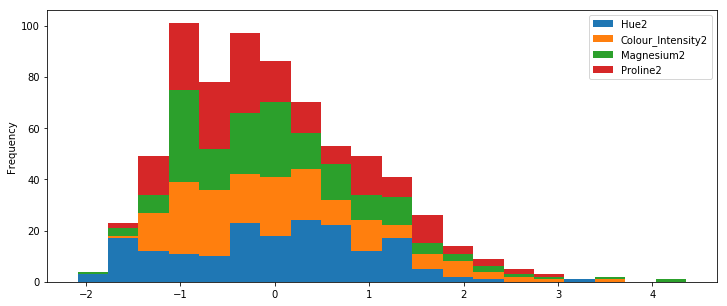

In [11]:
# Les histogrammes précédents sur le même graphique
df[['Hue2', 'Colour_Intensity2', 'Magnesium2', 'Proline2']].plot.hist(stacked=True, bins=20, figsize=(12, 5))

### Barres verticales

On souhaite faire le graphique en barres verticales des moyennes sur 3 mesures (avec les écarts types)

In [12]:
# Création de la valeur moyenne pour les 3 mesures
mean_values = [df.Alcohol.mean(), df.Magnesium.mean(), df.Colour_Intensity.mean()]

In [13]:
# Calcul de la liste des écarts, fixé à 0.25 au dessus de la moyenne
ecarts_types = [df.Alcohol.values.std(), df.Magnesium.values.std(), df.Colour_Intensity.values.std()]

In [14]:
mean_values

[13.000617977528091, 99.741573033707866, 5.0580898820224718]

In [15]:
ecarts_types

[0.80954291452851679, 14.242307673359806, 2.3117646609525573]

In [16]:
# on prend 1.96 ecart-type
ecarts_types_norm = [1.96*ec for ec in ecarts_types]
ecarts_types_norm

[1.5867041124758929, 27.914923039785219, 4.5310587354670124]

In [17]:
# Création des labels
bar_labels = ['Alcohol', 'Magnesium', 'Colour_Intensity']

In [18]:
bar_labels

['Alcohol', 'Magnesium', 'Colour_Intensity']

In [19]:
ecarts_types_norm

[1.5867041124758929, 27.914923039785219, 4.5310587354670124]

In [20]:
# Récupération de l'objet figure et de l'objet axis
fig, ax = plt.subplots(figsize=(10,5))
# Création des valeurs de l'axe des abscisses
x_pos = list(range(len(bar_labels)))
# Création du graphique
plt.bar(x_pos, mean_values, yerr = ecarts_types_norm, align = 'center', color = '#C9FFE5', alpha = 0.5)
# ajouter des grilles
plt.grid()
# Graduation et mlise en forme de l'axe y
# la fonction zip permet à partir de 2 listes distinctes, de créer un tuple (moyenne, variance) : 
# https://www.journaldev.com/15891/python-zip-function
max_y = max(zip(mean_values, ecarts_types_norm))
plt.ylim([0, (max_y[0] + max_y[1])*1.1])
plt.ylabel("Scores")
plt.xlabel("Values")
plt.xticks(x_pos, bar_labels)
plt.title("Mean scores for each test")
plt.show()
plt.savefig("histo1.png")
plt.close()
fig.clear

<bound method Figure.clear of <Figure size 720x360 with 1 Axes>>

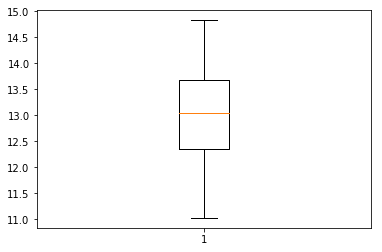

In [21]:
# Diagramme en boite
plt.boxplot(df.Alcohol.values)
plt.show()

In [22]:
# on norme les données pour pouvoir comparer leurs répartitions
data_norm = [(df.Alcohol.values-mean_values[0])/ecarts_types[0],(df.Magnesium.values-mean_values[1])/ecarts_types[1],(df.Colour_Intensity.values-mean_values[2])/ecarts_types[2]]

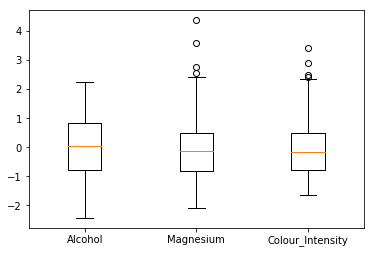

In [23]:
#diagramme en boite groupés
x_pos = [1,2,3]
plt.boxplot(data_norm)
plt.xticks(x_pos, bar_labels)
plt.show()

## Barres horizontales

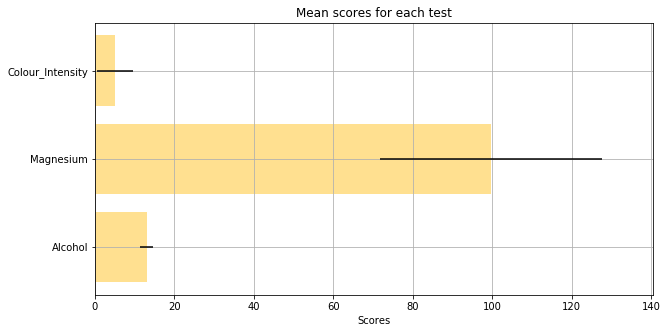

<bound method Figure.clear of <Figure size 720x360 with 1 Axes>>

In [24]:
# Récupération de l'objet figure et de l'objet axis
fig, ax = plt.subplots(figsize=(10,5))
# Création des valeurs de l'axe des abscisses
y_pos = list(range(len(bar_labels)))
# Création du graphique
plt.barh(y_pos, mean_values, xerr = ecarts_types_norm, align = 'center', color = '#FFC222', alpha = 0.5)
# ajouter des grilles
plt.grid()
# Graduation et mlise en forme de l'axe y
# la fonction zip permet à partir de 2 listes distinctes, de créer un tuple (moyenne, variance) : 
# https://www.journaldev.com/15891/python-zip-function
max_x = max(zip(mean_values, ecarts_types_norm))
plt.xlim([0, (max_x[0] + max_x[1])*1.1])
plt.xlabel("Scores")
plt.yticks(y_pos, bar_labels)
plt.title("Mean scores for each test")
plt.show()
plt.savefig('histo2.png')
plt.close()
fig.clear

## Ajouter les valeurs de barres au graphique

In [25]:
# fonction de labelisation des valeurs
def autolabel(bgraph):
    for bg in bgraph:
        height = bg.get_height()
        ax.text(bg.get_x() + bg.get_width()/3, 1.05*height, '%d'%int(height), ha = 'center', va = 'bottom')

In [26]:
# Récupération de l'objet figure et de l'objet axis
fig, ax = plt.subplots(figsize=(10,5))
# Création des valeurs de l'axe des abscisses
x_pos = list(range(len(bar_labels)))
# Création du graphique
mybargraph = plt.bar(x_pos, mean_values, yerr = ecarts_types_norm, align = 'center', color = '#C9FFE5', alpha = 0.5)
# ajouter des grilles
plt.grid()
# Graduation et mlise en forme de l'axe y
# la fonction zip permet à partir de 2 listes distinctes, de créer un tuple (moyenne, variance) : 
# https://www.journaldev.com/15891/python-zip-function
max_y = max(zip(mean_values, ecarts_types_norm))
plt.ylim([0, (max_y[0] + max_y[1])*1.1])
plt.ylabel("Scores")
plt.xlabel("Values")
plt.xticks(x_pos, bar_labels)
plt.title("Mean scores for each test")
autolabel(mybargraph)
plt.show()
plt.savefig("histo1.png")
plt.close()
fig.clear

<bound method Figure.clear of <Figure size 720x360 with 1 Axes>>

## Définition et paramètrage de graphiques en plusieurs cadrans

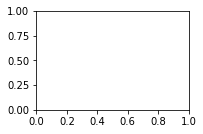

In [27]:
plt.subplot(221)

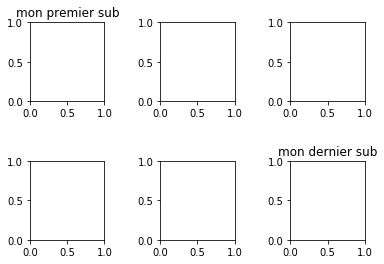

In [28]:
fig = plt.figure()
fig.add_subplot(231)
plt.title('mon premier sub')
fig.add_subplot(232)
fig.add_subplot(233)
fig.add_subplot(234)
fig.add_subplot(235)
fig.add_subplot(236)
plt.title('mon dernier sub')
plt.subplots_adjust(hspace=0.75, wspace=0.75)
plt.show()


In [29]:
values = list(df.Alcohol[1:5])

## Barres de comparaison (de valeurs) par groupe

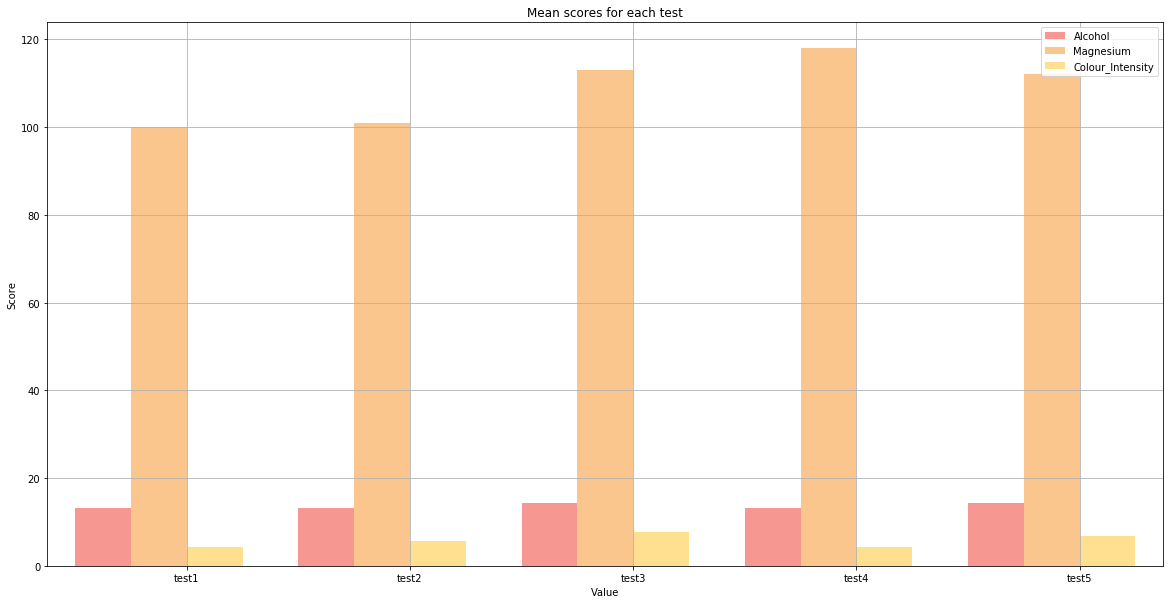

<bound method Figure.clear of <Figure size 1440x720 with 1 Axes>>

In [30]:
pos = list(range(len(df.Alcohol[1:6])))
# Récupération de l'objet figure et de l'objet axis
fig, ax = plt.subplots(figsize=(20,10))
width = 0.25
# Création des valeurs de l'axe des abscisses
x_pos = list(range(len(bar_labels)))
# Création du graphique, sur une variable
plt.bar(pos, df.Alcohol[1:6], width, alpha=0.5, color = "#EE3224", label = "Alcohol")
# Création du graphique, sur la deuxième variable
plt.bar([p + width for p in pos], df.Magnesium[1:6], width, alpha=0.5, color = "#F78F1E", label = "Magnesium")
# Création du graphique, sur la troisième variable
plt.bar([p + width*2 for p in pos], df.Colour_Intensity[1:6], width, alpha=0.5, color = "#FFC222", label = "Colour_Intensity")

# ajouter des grilles
plt.grid()
# Graduation et mlise en forme de l'axe y
# la fonction zip permet à partir de 2 listes distinctes, de créer un tuple (moyenne, variance) : 
# https://www.journaldev.com/15891/python-zip-function
max_y = max(zip(mean_values, ecarts_types_norm))
#plt.ylim([0, (max_y[0] + max_y[1])*1.1])
plt.ylabel("Scores")
plt.xlabel("Values")

# Titre de l'axe y
ax.set_ylabel('Score')
ax.set_xlabel('Value')

# Position des labels des groupes
ax.set_xticks([p +1.5*width for p in pos])
# Label des ticks
ax.set_xticklabels(['test1', 'test2', 'test3', 'test4', 'test5'])

plt.xlim(min(pos)-width, max(pos)+width*3)
plt.legend(['Alcohol', 'Magnesium', 'Colour_Intensity'], loc= 'upper right')
plt.title("Mean scores for each test")
plt.show()
plt.savefig("histo1.png")
plt.close()
fig.clear

## Barres inversées (modèle des pyramides des âges)

In [31]:
# Extraction d'une matrice de 5 éléments
tuplet = zip(df.Alcohol[1:6], df.Magnesium[1:6], df.Colour_Intensity[1:6])

In [32]:
df3 = pd.DataFrame(tuplet)

In [33]:
list(df3.columns)

[0, 1, 2]

In [34]:
df4 = df3.rename(columns=({
    0:'Alcohol',
    1:'Magnesium',
    2:'Colour_Intensity',
}))

In [35]:
df4

Alcohol  Magnesium  Colour_Intensity
0    13.20        100              4.38
1    13.16        101              5.68
2    14.37        113              7.80
3    13.24        118              4.32
4    14.20        112              6.75

In [36]:
max(df4.Magnesium)

118

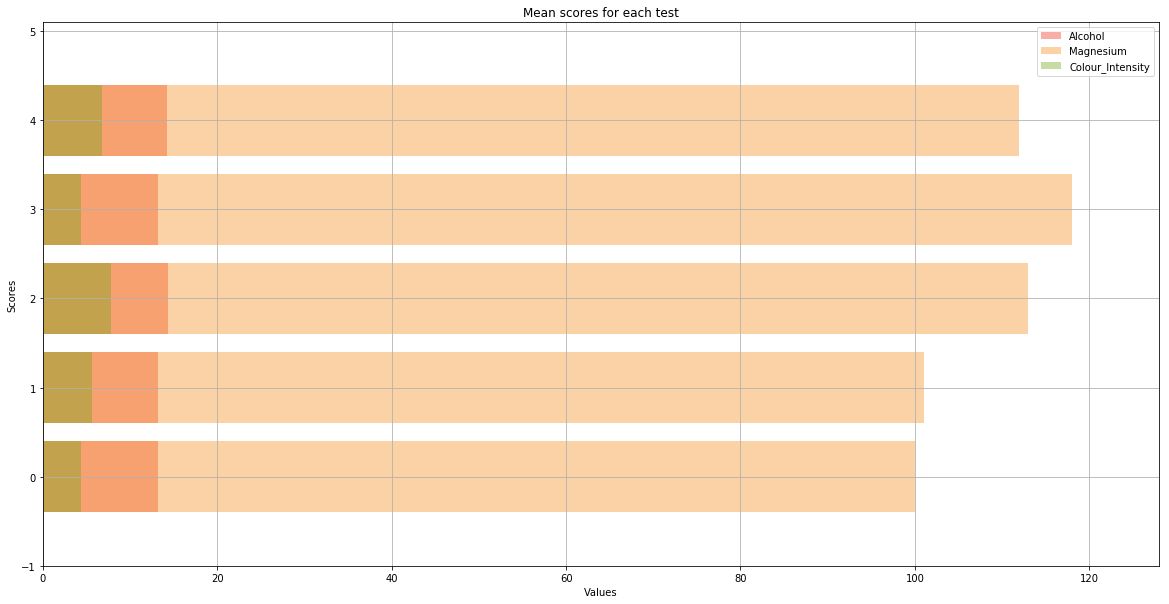

<bound method Figure.clear of <Figure size 1440x720 with 1 Axes>>

In [37]:
# Récupération de l'objet figure et de l'objet axis
fig, ax = plt.subplots(figsize=(20,10))
width = 0.25
# Création des valeurs de l'axe des abscisses
y_pos = list(range(len(df4)))
# Création du graphique, sur une variable
plt.barh(y_pos, df4.Alcohol, align = 'center', alpha=0.4, color = "#EE3224", label = "Alcohol")
# Création du graphique, sur la deuxième variable
plt.barh(y_pos, df4.Magnesium, align = 'center', alpha=0.4, color = "#F78F1E", label = "Magnesium")
# Création du graphique, sur la deuxième variable
plt.barh(y_pos, df4.Colour_Intensity, align = 'center', alpha=0.4, color = "#77A61D", label = "Colour_Intensity")

plt.grid()
plt.ylabel("Scores")
plt.xlabel("Values")
plt.ylim([-1, len(df4)+0.1])
plt.xlim([0, max(df4.Magnesium)+10])

plt.legend(['Alcohol', 'Magnesium', 'Colour_Intensity'], loc= 'upper right')
plt.title("Mean scores for each test")
plt.show()
plt.savefig("histo1.png")
plt.close()
fig.clear

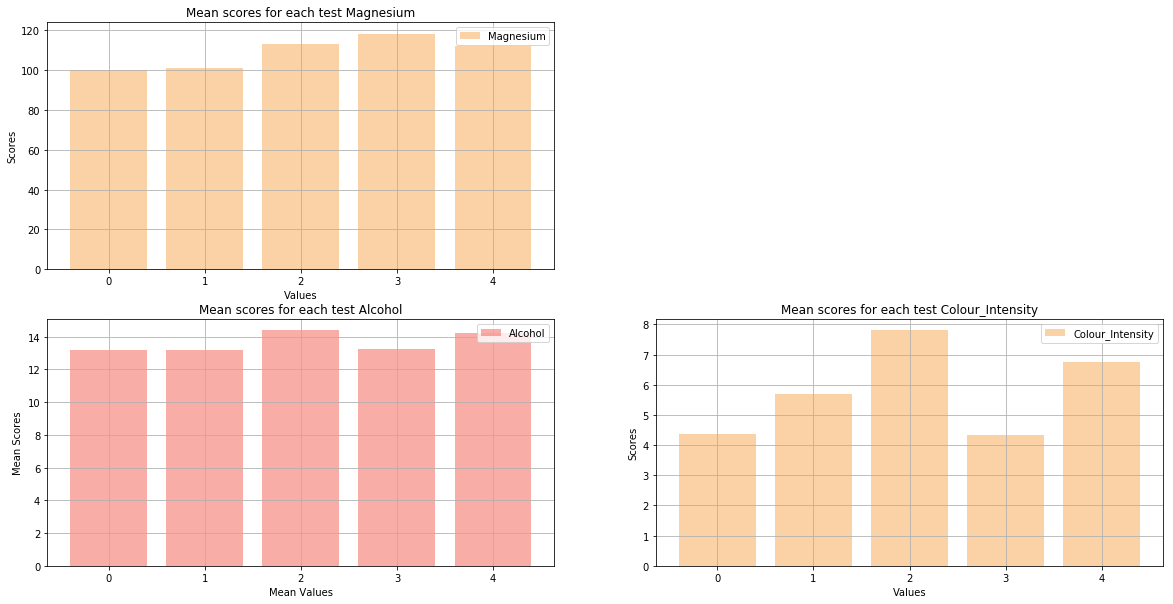

<bound method Figure.clear of <Figure size 1440x720 with 3 Axes>>

In [38]:
pos = list(range(len(df.Magnesium[1:6])))
# Récupération de l'objet figure et de l'objet axis
fig = plt.figure('myfigure', figsize=(20,10))

# Création du cadran Magnésium
ax = fig.add_subplot(221)
width = 0.25
# Création des valeurs de l'axe des abscisses
x_pos = list(range(len(df4)))
# Création du graphique, sur la deuxième variable
plt.bar(x_pos, df4.Magnesium[0:6], align = 'center', alpha=0.4, color = "#F78F1E", label = "Magnesium")
ax.set_ylabel("Scores")
ax.set_xlabel("Values")
ax.set_title('Mean scores for each test Magnesium')
plt.grid()
plt.legend(['Magnesium'], loc= 'upper right')

# Création du cadran Alcohol
ax = fig.add_subplot(223)
width = 0.25
x_pos = list(range(len(df4)))
# Création du graphique, sur la deuxième variable
plt.bar(x_pos, df4.Alcohol[0:6], align = 'center', alpha=0.4, color = "#EE3224", label = "Alcohol")
ax.set_ylabel("Mean Scores")
ax.set_xlabel("Mean Values")
ax.set_title('Mean scores for each test Alcohol')
plt.grid()
plt.legend(['Alcohol'], loc= 'upper right')

# Création du cadran Colour Intensity
ax = fig.add_subplot(224)
width = 0.25
# Création des valeurs de l'axe des abscisses
x_pos = list(range(len(df4)))
# Création du graphique, sur la deuxième variable
plt.bar(x_pos, df4.Colour_Intensity[0:6], align = 'center', alpha=0.4, color = "#F78F1E", label = "Colour_Intensity")
ax.set_ylabel("Scores")
ax.set_xlabel("Values")
ax.set_title('Mean scores for each test Colour_Intensity')
plt.grid()
plt.legend(['Colour_Intensity'], loc= 'upper right')

plt.show()
plt.savefig("histo1.png")
plt.close()
fig.clear